# Actividad 2.2
En este ejercicio vamos a hacer scrapping sobre una página de meteorología para luego aplicar un simple modelo predictivo de Machine Learning

En el ejercicio tendrás que programas parte de un código python. En concreto, las partes a programar tienen las siguientes características:
+ Vienen precedidas por el comentario: __########INSERTAR CODIGO AQUI__. Eso quiere decir que la parte a programar será en la línea o líneas inmediatamente inferiores
+ En concreto tendrás que rellenar aquellas partes en las que ponga la  palabra clave __None__ (elimina la palabra None y escribe tu código)
+ Es posible que tengas que contestar a preguntas con texto. Para ello se han habilitado celdas de texto vacías, que podrás rellenar

__Descripción__:
La página https://www.tutiempo.net/clima/ws-82210.html contiene información histórica sobre distintos indicadores meteorológicos en una ubicación concreta, Madrid / Barajas.

Nuestros objetivos van a ser:
1. Hacer scraping sobre la página para obtener como resultado un dataframe de pandas (una tabla) que tenga todos los datos que hay en la web

2. Limpiar y transformar los datos para que podamos hacer mineria de datos sobre ellos

3. Análisis exploratorio de datos y detección de outilers

4. Generacion de un pequeño sistema predictivo (clasificación) 

#### 1 - Generación de nuestro dataset de trabajo
* Vamos a empezar importando las librerias de numpy, pandas, matplotlib, requests y BeautifulSoup

In [1]:
########INSERTAR CODIGO AQUI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

* A continuación hacemos la petición al servidor de la web y vemos que el estado resultante es adecuado

In [2]:
#Hacemos la petición mediante un get de requests
########INSERTAR CODIGO AQUI
res = requests.get("https://www.tutiempo.net/clima/ws-82210.html")

#Observamos el código de estado de nuestra petición
########INSERTAR CODIGO AQUI
print(f"Tu peticion ha obtenido el código de estado: {res.status_code}")

Tu peticion ha obtenido el código de estado: 200


* Ahora vamos a usar BeautifulSoup para parsear el contenido de res. Usa el parser 'html'. Lo guardaremos en la variable soup

In [3]:
#Parseamos el contenido de nuestra petición con BeautifulSoup, con parser tipo 'html'
########INSERTAR CODIGO AQUI
soup = BeautifulSoup(res.content, 'html')

* Antes de empezar, vamos a guardarnos en una variable el título de la web, ya que luego lo usaremos para nombrar nuestras tablas

__TIP 1__: Busca con el inspector del navegador el nombre del tag del título ('Clima Madrid / Barajas Datos climáticos: xxx) y la clase que tiene asignada ese tag

__TIP 2__: usa la función __.find('nombre_tag', class_='clase_del_tag')__ de BeautifulSoup

In [4]:
#Guardamos la información del tag
########INSERTAR CODIGO AQUI
div_titulo = soup.find("h2")

#Obtenemos el texto en dicho tag
########INSERTAR CODIGO AQUI
titulo = div_titulo.text

print(f'El titulo de la página es: {titulo}')

El titulo de la página es: Clima Madrid / Barajas Datos climáticos:  1973 - 2022


* A continuación vamos a pasar la tabla de datos a un dataframe de pandas.
1. Vamos a guardar todos los datos del tag 'table'. Usa para ello la función __find__ de BeautifulSoup, teniendo en cuenta la clase de ese tag

In [5]:
#Accedemos al tag de tipo 'table', teniendo en cuenta su clase
########INSERTAR CODIGO AQUI
tag_table = soup.find("table", "medias")

print('Las dos primeras entradas de la tabla son:\n')
display(tag_table.find_all("tr")[0:2])

Las dos primeras entradas de la tabla son:



[<tr><th>Año</th><th><abbr class="tooltip" title="Temperatura media anual">T</abbr></th><th><abbr class="tooltip" title="Temperatura máxima media anual">TM</abbr></th><th><abbr class="tooltip" title="Temperatura mínima media anual">Tm</abbr></th><th><abbr class="tooltip" title="Precipitación total anual de lluvia y/o nieve derretida (mm)">PP</abbr></th><th><abbr class="tooltip" title="Velocidad media anual del viento (Km/h)">V</abbr></th><th><abbr class="tooltip" title="Total días con lluvia durante el año">RA</abbr></th><th><abbr class="tooltip" title="Total días que nevó durante el año">SN</abbr></th><th><abbr class="tooltip" title="Total días con tormenta durante el año">TS</abbr></th><th><abbr class="tooltip" title="Total días con niebla durante el año">FG</abbr></th><th><abbr class="tooltip" title="Total días con tornados o nubes de embudo durante el año">TN</abbr></th><th><abbr class="tooltip" title="Total días con granizo durante el año">GR</abbr></th></tr>,
 <tr><td class="tc1"

2. Almacenamos la información del tag de la tabla en un dataframe de Pandas y visualizamos su dimension y las 5 primeras filas

__TIP 1:__ Para crear el data frame usa la función de pandas __read_html(str(tag))[0]__

__TIP 2:__ La dimension de un dataframe, al igual que de un array, se puede ver con .shape

__TIP 2:__ Para visualizar las primeras filas, usa una función de pandas, no un bucle

In [6]:
#Creamos el dataframe (tabla de datos) a partir del tag
########INSERTAR CODIGO AQUI
df = pd.read_html(str(tag_table))[0]

#Vemos la dimensión de nuestra tabla
########INSERTAR CODIGO AQUI
print(f'Nuestra tabla tiene esta dimension: {df.shape}')

#Visualizamos las primeras 5 muestras de nuestro dataframe
df.head(5)

Nuestra tabla tiene esta dimension: (50, 12)


,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1973,13.3,20.5,6.4,332.99,8.2,94,5,22,18,0,0
1,1974,13.3,20.2,6.7,320.02,8.5,107,0,27,27,0,3
2,1975,13.3,20.1,6.9,372.64,8.2,123,2,26,15,0,2
3,1976,13.3,20.1,7.0,530.60,7.3,125,2,38,20,0,1
4,1977,13.5,19.8,7.4,698.54,8.0,134,8,18,42,0,6


__Pregunta__: Si vamos a usar estos datos para un sistema de Machine Learning: 1) ¿Hasta cuantas dimensiones crees que podría tener cada muestra?, 2) ¿Qué tamaño (número de muestras) tendría nuestro dataset inicial? Responde brevemente pero de forma razonada a ambas preguntas en la siguiente celda.

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Actualmente, las dimensiones que tenemos son 50, sin embargo, este número estará sometido a cambios en el futuro, ya que los datos se encuentran en crudo todavía, sin haber sido sometidos a limpiezas y cambios. El número de dimensiones o características que podría tener cada muestra podría ser infinito y dependería del año desde el cual se tuvieran registro de las condiciones climáticas. Mientras se obtengan más datos, se podrá entrenar el modelo de mejor manera, sin embargo, este dataset se considera bastante pequeño, ya que, uno promedio se ecuentra comprendido entre los valores de 500 a 100 mil muestras.

Nuestro dataset inicial cuenta con 12 muestras, las cuales son: Temperatura media anual, Temperatura máxima media anual, Temperatura mínima media anual, Precipitación total anual de lluvia y/o nieve derretida (mm), Velocidad media anual del viento (Km/h), Total días con lluvia durante el año, Total días que nevó durante el año, Total días con tormenta durante el año, Total días con niebla durante el año, Total días con tornados o nubes de embudo durante el año, Total días con granizo durante el año


#### 2 - Análisis preliminar, limpieza y transformación de nuestro dataset

* Empezamos haciendo un doble análisis de los datos. Primero, siendo que no hay muchas filas, vamos a analizar si hay filas con datos faltantes (__TIP__: Busca las filas que tienen algún '-' y apunta su índice)

In [7]:
display(df)

,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1973,13.3,20.5,6.4,332.99,8.2,94,5,22,18,0,0
1,1974,13.3,20.2,6.7,320.02,8.5,107,0,27,27,0,3
2,1975,13.3,20.1,6.9,372.64,8.2,123,2,26,15,0,2
3,1976,13.3,20.1,7.0,530.60,7.3,125,2,38,20,0,1
4,1977,13.5,19.8,7.4,698.54,8.0,134,8,18,42,0,6
5,1978,13.7,20.4,7.3,497.60,8.8,113,9,16,12,0,1
6,1979,14.1,20.4,8.1,397.75,9.0,119,6,25,22,0,2
7,1980,13.8,20.5,7.3,309.89,8.8,100,5,21,27,0,1
8,1981,14.3,21.4,7.5,345.93,9.1,98,6,23,9,0,2
9,1982,14.4,20.8,8.0,442.71,8.0,79,1,27,26,0,0


En la tabla anterior, se puede ver que las filas que contienes datos faltantes con el caracter "-", son las siguientes: 29, 32, 49

* Vamos a limpiar los datos:
1. Generamos una lista en python con los índices de las filas con datos faltantes (Ejemplo de lista l=[elemento_1, elemento_2, ..., elemento_n])
2. Eliminamos del dataframe las filas identificadas como malas (con datos faltantes). El resultado lo guardamos en un segundo dataframe

__TIP:__ Para eliminar filas de un dataframe usaremos la función __.drop(lista_filas_a_eliminar, axis = 0, inplace = False)__

In [8]:
#Generamos una lista con los índices que queremos borrar
########INSERTAR CODIGO AQUI
row_indexes_of_missing_data = [29, 32, 49]

#Eliminamos de nuestro dataframe las filas contenidas en la lista anterior
########INSERTAR CODIGO AQUI
df_cleaned = df.drop(row_indexes_of_missing_data, axis = 0, inplace = False)

print("Mis datos limpios son:\n")
display(df_cleaned)

Mis datos limpios son:



,Año,T,TM,Tm,PP,V,RA,SN,TS,FG,TN,GR
0,1973,13.3,20.5,6.4,332.99,8.2,94,5,22,18,0,0
1,1974,13.3,20.2,6.7,320.02,8.5,107,0,27,27,0,3
2,1975,13.3,20.1,6.9,372.64,8.2,123,2,26,15,0,2
3,1976,13.3,20.1,7.0,530.60,7.3,125,2,38,20,0,1
4,1977,13.5,19.8,7.4,698.54,8.0,134,8,18,42,0,6
5,1978,13.7,20.4,7.3,497.60,8.8,113,9,16,12,0,1
6,1979,14.1,20.4,8.1,397.75,9.0,119,6,25,22,0,2
7,1980,13.8,20.5,7.3,309.89,8.8,100,5,21,27,0,1
8,1981,14.3,21.4,7.5,345.93,9.1,98,6,23,9,0,2
9,1982,14.4,20.8,8.0,442.71,8.0,79,1,27,26,0,0


__Pregunta__: ¿Con lo que sabemos ahora, cambiarías tu respuesta sobre el número de dimensiones o el número de muestras útiles en nuestro dataset? Responde brevemente en la siguiente celda

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Sí, cambiaría mi respuesta, porque al ver el dataset completo, se ha identificado que se tenía datos faltantes, los cuales no aportarían información útil al momento de entrenar, validar y tester el modelo, por lo tanto, el valor de dimensiones que deberíamos manejar son 47.

* Ahora vamos a transformar los datos. Para ello vamos a renombrar las columnas para poner un nombre más inteligible, luego veremos en qué formato están los datos, y finalmente, si lo vemos conveniente, los transformaremos a formato numérico

1. Vamos a convertir los nombres (headers) de nuestras columnas del dataframe. Primero hacemos una copia de nuestro dataframe (__funcion .copy()__), luego sustituimos los antiguos nombres de columna por los nuevos (usaremos el atributo df.columns y le asignaremos los nuevos nombres)

In [9]:
#Definimos los nuevos nombres de columnas
new_headers = ['Año', 'TempMedia', 'TempMax', 'Tempmin', 'Precipitacion',
               'VelocidadViento', 'DiasLluvia', 'DiasNieve', 'DiasTormenta',
              'DiasNiebla', 'DiasTornado', 'DiasGranizo']

#Clonamos el dataframe de datos limpiados y lo guardamos en una nueva variable
########INSERTAR CODIGO AQUI
df_transformed = df_cleaned.copy()

#Asignamos al atributo .columns de nuestro nuevo dataframe los nombres que hemos definido
########INSERTAR CODIGO AQUI
df_transformed.columns = new_headers

print("Comprobacion. Mi dataset tiene ahora estas columnas:")
df_transformed.head()

Comprobacion. Mi dataset tiene ahora estas columnas:


,Año,TempMedia,TempMax,Tempmin,Precipitacion,VelocidadViento,DiasLluvia,DiasNieve,DiasTormenta,DiasNiebla,DiasTornado,DiasGranizo
0,1973,13.3,20.5,6.4,332.99,8.2,94,5,22,18,0,0
1,1974,13.3,20.2,6.7,320.02,8.5,107,0,27,27,0,3
2,1975,13.3,20.1,6.9,372.64,8.2,123,2,26,15,0,2
3,1976,13.3,20.1,7.0,530.60,7.3,125,2,38,20,0,1
4,1977,13.5,19.8,7.4,698.54,8.0,134,8,18,42,0,6


2. Vemos la información de nuestro dataframe. ¿Están nuestros datos ya en formato numérico? Responde brevemente y de forma razonada en la celda habilitada para ello

In [10]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 48
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Año     47 non-null     int64 
 1   T       47 non-null     object
 2   TM      47 non-null     object
 3   Tm      47 non-null     object
 4   PP      47 non-null     object
 5   V       47 non-null     object
 6   RA      47 non-null     object
 7   SN      47 non-null     object
 8   TS      47 non-null     object
 9   FG      47 non-null     object
 10  TN      47 non-null     object
 11  GR      47 non-null     object
dtypes: int64(1), object(11)
memory usage: 4.8+ KB


__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Al ver el tipo de dato de cada columna, se puede observar que solamente la columna llamada Año es de tipo enteros, y las demás son de tipo 'object', por lo tanto, es necesario que se tranformen a tipo numérico.

3. Transformamos las columnas a formato numérico. Para ello iremos columna a columna (sólo aquellas que creamos convenientes) y le iremos cambiando el tipo de datos. Finalmente, comprueba de alguna forma que la transformación se ha producido

__TIP 1:__ Se puede cambiar el tipo de todos los datos de una columna de un dataframe usando __df['nombre_columna'] = df['nombre_columna'].astype(tipo_salida)__

__TIP 2:__ Podemos ir una a una por todas las columnas (1 línea de código por columna cambiada), o bien podemos hacer un bucle _for_, ya que tenemos todos los nombres de las columnas en una variable. Recuerda si haces esto, que igual nos interesa usar rangos dentro la lista de nombres [valor_inicial:valor_final:paso]

In [11]:
#Convertimos los datos (elige: columna a columna o mediante bucle for)
########INSERTAR CODIGO AQUI (son múltiples líneas de código)
df_transformed["TempMedia"] = df_transformed["TempMedia"].astype(float)
df_transformed["TempMax"] = df_transformed["TempMax"].astype(float)
df_transformed["Tempmin"] = df_transformed["Tempmin"].astype(float)
df_transformed["Precipitacion"] = df_transformed["Precipitacion"].astype(float)
df_transformed["VelocidadViento"] = df_transformed["VelocidadViento"].astype(float)
df_transformed["DiasLluvia"] = df_transformed["DiasLluvia"].astype(float)
df_transformed["DiasNieve"] = df_transformed["DiasNieve"].astype(float)
df_transformed["DiasTormenta"] = df_transformed["DiasTormenta"].astype(float)
df_transformed["DiasNiebla"] = df_transformed["DiasNiebla"].astype(float)
df_transformed["DiasTornado"] = df_transformed["DiasTornado"].astype(float)
df_transformed["DiasGranizo"] = df_transformed["DiasGranizo"].astype(float)

#Comprobamos si la transformación ha tenido lugar
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 0 to 48
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              47 non-null     int64  
 1   TempMedia        47 non-null     float64
 2   TempMax          47 non-null     float64
 3   Tempmin          47 non-null     float64
 4   Precipitacion    47 non-null     float64
 5   VelocidadViento  47 non-null     float64
 6   DiasLluvia       47 non-null     float64
 7   DiasNieve        47 non-null     float64
 8   DiasTormenta     47 non-null     float64
 9   DiasNiebla       47 non-null     float64
 10  DiasTornado      47 non-null     float64
 11  DiasGranizo      47 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 4.8 KB


__Pregunta__: ¿Se ha producido la transformación? Explícalo en una línea en la siguiente celda

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Sí, se ha producido la transformación de tipo 'object' a 'float64', por lo tanto, ahora nuestros datos son de tipo numérico.

#### 3 - Análisis exploratorio e identificación de outliers (visual y con ML)

* Vamos a empezar visualizando los datos más importantes: Temperatura Media y Precipitaciones anuales. En ambos casos, el eje x serán los años

1. Convierte las columnas Año, TempMedia y Precipitacion de nuestro dataframe cada una a un array de numpy

__TIP__: Usa la función de pandas df['columna'].to_numpy()

In [12]:
#Convertimos cada columna a un array de numpy
########INSERTAR CODIGO AQUI
year_array = df_transformed["Año"].to_numpy()
temp_array = df_transformed["TempMedia"].to_numpy()
rain_array = df_transformed["Precipitacion"].to_numpy()

#Comprobamos los resultados
print(f"Primeros cinco años: {year_array[:5]}")
print(f"Primeras cinco Temp. Medias: {temp_array[:5]}")
print(f"Primeras cinco Precipitaciones anuales: {rain_array[:5]}")

Primeros cinco años: [1973 1974 1975 1976 1977]
Primeras cinco Temp. Medias: [13.3 13.3 13.3 13.3 13.5]
Primeras cinco Precipitaciones anuales: [332.99 320.02 372.64 530.6  698.54]


2. Análisis exploratorio de datos (EDA). Vamos a visualizar en un mismo gráfico la evolución de la temperatura media y la precipitación anual. __Importante: la precipitación actualmente está en mm, pero por comodidad, la querremos visualizar como dm, es decir, dividiremos el array/100__
Para visualiar usaremos el plot de matplotlib, y haremos que la temperatura se marque como una línea continua roja, mientras que la precipitación se marcará como una línea azul, discontinua (a rayas intermintentes) y que cada punto anual se marque con un círculo. Además, a la gráfica le pondremos como título, el título de la página web (lo tenemos en una variable), pondremos un grid y pondremos una leyenda para saber qué es cada curva 

__TIP 1:__ En la prácitca de introducción a matplotlib se vió cómo formatear las curvas en un plot de matplotlib (colores, puntos, tipo de línea)

__TIP 2:__ Para que la leyenda tenga sentido, habrá que utilizar la etiqueta __label='nombre_de_curva'__ en el plot

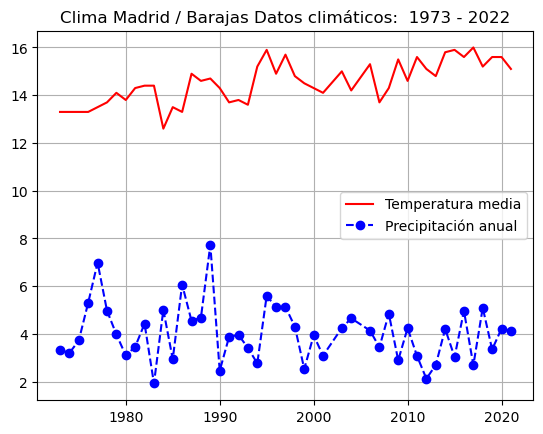

In [13]:
########INSERTAR CODIGO AQUI
plt.plot(year_array, temp_array, 'r-', label = "Temperatura media")
plt.plot(year_array, rain_array/100, 'bo--', label = "Precipitación anual")
plt.title(titulo)
plt.grid()
plt.legend()

__Pregunta:__ ¿Serías capaz de identificar outliers en la serie anterior, combinando precipitación y temperatura? Da tu respuesta en un par de líneas en la siguiente celda.

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Por el momento, viendo la gráfica anterior, no se puede notar outliers a simple vista, tenemos que hacer un análisis más profundo para identificarlos.

* Vamos a hacer ahora un análisis de outliers tanto basado en el análisis visual de los datos, como en el análisis con Machine Learning

1. Vamos a visualizar los datos conjuntos de Temperatura (eje x) y Precipitación (eje y), usando el scatterplot de matplotlib. Le pondremos título a la gráfica (el título de la web), etiqueta de eje x, etiqueta de eje y, y grid

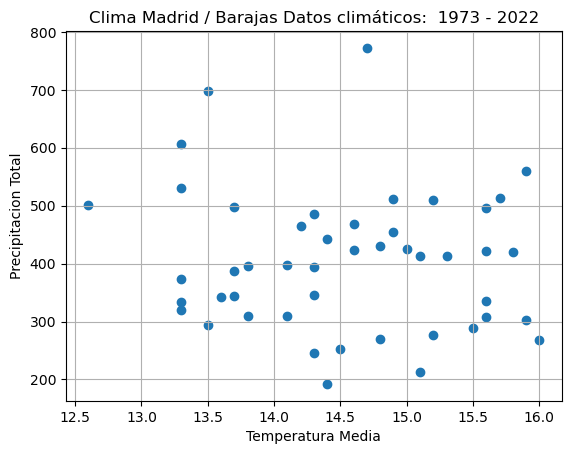

In [14]:
########INSERTAR CODIGO AQUI
plt.scatter(temp_array, rain_array)
plt.title(titulo)
plt.xlabel('Temperatura Media')
plt.ylabel('Precipitacion Total')
plt.grid()

__Pregunta:__ ¿Viendo la gráfica de puntos, serías ahora capaz de identificar mejor los outliers? Señala (alude a sus valores para referirte a ellos) los 5 puntos que más te parezcan outliers y explica en un par de líneas por qué crees que lo son.

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Con la gráfica anterior, se puede identificar de manera más fácil los outliers, los 5 puntos que más parecen outliers se explican a continuación:
- El punto ubicado en la posición (14.7, 760) aproximadamente, porque se encuentra tan arriba y tan lejos de los demás puntos.
- El punto ubicado en la posición (12.6, 500) aproximadamente, porque su situación con respecto a los demás puntos es alejada a la izquierda, tanto, que sale de contexto.
- El punto ubicado en la posición (13.5, 700) aproximadamente, porque su posición se encuentra alejada de los demás, por lo tanto, asumo que no se encuentra en ningún grupo de puntos.
- Los puntos ubicado en las posición (13.4, 520) y (13.4, 600) aproximadamente, al igual que los anteriores, se encuentran fuera de las regiones de aglomeraciones, por lo tanto, se consideran outliers

2. Vamos a aplicar un sistema de Machine Learning de clustering, para ver si estadísticamente considera los mismos outliers que hemos considerado nosotros, teniendo en cuenta igualmente la temperatura y la precipitación anual. Tendremos que normalizar los datos antes.

__a.__ Creamos la matriz (array 2d de numpy) de datos a partir del dataframe de datos transformados y la normalizamos utilizando el objeto StandardScaler del paquete preprocessing de sklearn

__TIP__: Puedes normalizar los datos usando la función __fit_transform(datos)__

In [15]:
#Generamos nuestra matriz de datos de 47 muestras y 2 dimensiones
data = df_transformed[['TempMedia', 'Precipitacion']].to_numpy()

########INSERTAR CODIGO AQUI
print(f"El tamaño de nuestros datos es: {data.shape}")

#Importamos la clase StandardScaler del paquete preprocessing de sklearn
########INSERTAR CODIGO AQUI
from sklearn.preprocessing import StandardScaler

#Generamos una variable de tipo StandardScaler y con ella normalizamos los datos
########INSERTAR CODIGO AQUI
standard_scaler = StandardScaler()
data_scaled = standard_scaler.fit_transform(data)

El tamaño de nuestros datos es: (47, 2)


__b.__ Importamos de la libreria sklearn, del paquete cluster, la clase AgglomerativeClustering. Creamos un objeto de tipo AgglomerativeClustering que tenga como hiperparámetros (parámetros de inicialización): n_culsters = 7, affinity = 'euclidean', linkage = 'single'

In [16]:
#Importamos la clase AgglomerativeClustering
########INSERTAR CODIGO AQUI
from sklearn.cluster import AgglomerativeClustering

#Instanciamos un objeto de tipo AgglomerativeClustering con 3 hiperparámetros
########INSERTAR CODIGO AQUI
ag_clustering_model = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'single')

__c.__ Entrenamos el modelo con nuestros datos y predecimos una etiqueta para cada uno de ellos

__TIP:__ Puedes hacer las dos operaciones en una si usas __.fit_predict()__

In [17]:
#Entrenamos nuestro modelo de clustering y predecimos para nuestros datos escalados
predicted_labels_from_clustering = ag_clustering_model.fit_predict(data_scaled)

__d.__ Hacemos el scatterplot de matplotlib de los datos, y en este caso le ponemos color según las etiquetas predichas y el mapa de colores cmap='viridis'.Luego generamos una barra de colores (__colorbar()__) 

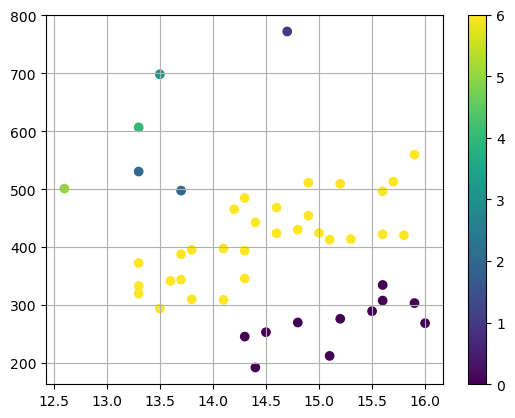

In [18]:
plt.grid()
########INSERTAR CODIGO AQUI
plt.scatter(data[:,0], data[:,1], c=predicted_labels_from_clustering, cmap='viridis')
plt.colorbar()

__Pregunta:__ ¿Viendo la gráfica de puntos generada y la distribución de los clusters (distintos colores), crees que el sistema ha agrupado las muestras de la misma forma que lo habrías hecho tú? ¿Crees que el sistema ha identificado los mismos outliers que tú habías identificado antes? Responde brevemente a estas preguntas en la siguiente celda.

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

Observando la gráfica anterior, se puede ver que los outliers que hemos identificado anteriormente son los mismos, sin embargo, se ha incrementado uno y es el punto ubicado en la posición (13.7, 500) aproximadamente,  ya que, el sistema de Machine Learning, lo colorea de un solo color, por lo tanto, no pertenece a ningun cluster.

#### 4 - Generación de un pequeño sistema predictivo

Para finalizar esta actividad, vamos a intentar generar un pequeño sistema predictivo. Hemos de ser conscientes de que la cantidad de datos en nuestro dataset es extremadamente pequeña (menos de 50 muestras), y por tanto no podremos conseguir buenos resultados.

En concreto vamos a intentar hacer un clasificador binario, que dados los datos meteorológicos de un año, va a intentar predecir si ese día ha habido múltiples días de granizo o no. Al ser un clasificador binario, sabemos que si la tasa de acierto es cercana al 50%, no habremos conseguido nada (misma probabilidad de acertar que de fallar). En cambio, cualquier tasa de acierto que esté por encima ya será un éxito.

Planteamos este ejercicio en dos pasos:

__Paso 1.__ Generación de un clasificador directamente sobre los datos

* Generamos un nuevo dataframe que sea copia del dataframe de datos transformados (usas __.copy()__). A continuación visualizamos el histograma de días con granizo para determinar en promedio qué deberíamos considerar un _año con poco granizo_ frente a un _año con mucho granizo_

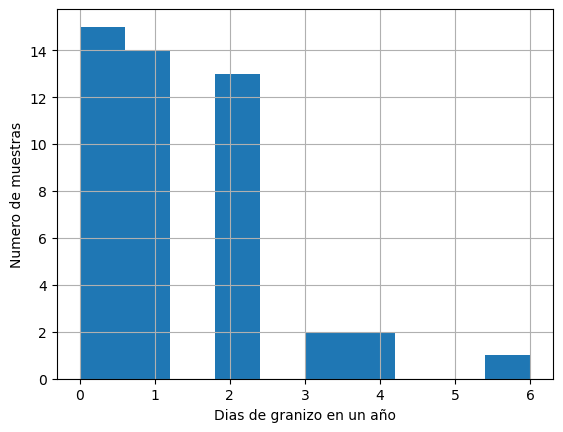

In [19]:
#Generamos un dataframe copia del anterior
########INSERTAR CODIGO AQUI
df_ml =  df_transformed.copy()

#mostramos el histograma de días de granizo
plt.hist(df_ml['DiasGranizo'])
plt.xlabel('Dias de granizo en un año')
plt.ylabel('Numero de muestras')
plt.grid()

* A la vista de los resultados del histograma, podríamos decir que hay una separación entre los años que hay 0 o 1 día de granizo, y los años que tienen más de un día de granizo. Por lo tanto, generamos nuestra columna objetivo, que tendrá dos posibles valores de clase:

0- _Año con poco granizo_. Si en ese año ha habido 1 o menos días de granizo

1- _Año con mucho granizo_. Si en ese año ha habido 2 o más días de granizo

In [20]:
#Generamos una Serie de tipo binario según el criterio de antes para días de granizo
listado_binario_granizo = (df_transformed['DiasGranizo'] > 1).astype(int)
display(listado_binario_granizo)

0     0
1     1
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    0
11    1
12    1
13    0
14    0
15    0
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    0
24    0
25    0
26    0
27    0
28    0
30    0
31    0
33    0
34    0
35    1
36    0
37    1
38    0
39    0
40    0
41    0
42    0
43    0
44    1
45    1
46    0
47    1
48    0
Name: DiasGranizo, dtype: int32

In [21]:
#Añadimos una nueva columna a nuestro dataframe con ese listado
########INSERTAR CODIGO AQUI
df_ml['Año_granizo'] = listado_binario_granizo
display(df_ml.sample(5))

,Año,TempMedia,TempMax,Tempmin,Precipitacion,VelocidadViento,DiasLluvia,DiasNieve,DiasTormenta,DiasNiebla,DiasTornado,DiasGranizo,Año_granizo
40,2013,14.8,21.2,8.2,269.99,10.8,113.0,6.0,14.0,11.0,0.0,0.0,0
37,2010,14.6,20.6,8.4,424.17,10.1,117.0,11.0,14.0,17.0,0.0,2.0,1
16,1989,14.7,22.0,8.3,772.40,8.3,124.0,2.0,39.0,14.0,1.0,4.0,1
13,1986,13.3,20.4,6.9,606.79,7.4,95.0,3.0,17.0,28.0,0.0,0.0,0
30,2003,15.0,21.0,8.6,424.67,9.5,90.0,2.0,14.0,11.0,0.0,0.0,0


* Generamos nuestra matriz (array 2d de numpy) de muestras X, con todos los datos excepto el año (en realidad se trata como un índice) y excepto las columnas referentes a granizo (es lo que queremos predecir). A continuación generamos nuestro vector y (array de numpy) a partir de la columna 'Año_granizo'

In [22]:
#Generamos los datos X
X = df_ml[['TempMedia', 'TempMax', 'Tempmin', 'VelocidadViento','DiasLluvia',
           'DiasNieve', 'DiasTormenta', 'DiasNiebla', 'DiasTornado']].to_numpy()

#Generamos los targets y
########INSERTAR CODIGO AQUI
y = df_ml[['Año_granizo']].to_numpy()

print(f"Tamaño de datos X: {X.shape}")
print(f"Tamaño de etiquetas y: {y.shape}")

Tamaño de datos X: (47, 9)
Tamaño de etiquetas y: (47, 1)


* Segmentamos nuestro dataset en dos, datos de entrenamiento y datos de test. Para ello utilizamos la función __train_test_split__ de sklearn (del paquete model_selection). Dados los pocos datos que tenemos, hemos decidido dividir en 70% datos para entrenamiento y 30% para test. En la función train_test_split usaremos los siguientes parámetros de función: test_size = 0.30 y random_state = 22

In [23]:
#Importamos la funcion train_test_split del paquete model_selection de sklearn
########INSERTAR CODIGO AQUI
from sklearn.model_selection import train_test_split

#Hacemos la segmentación de datos considerando 30% de datos para test y random_state = 22
########INSERTAR CODIGO AQUI
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 22)

print(f"Tamaño dataset entrenamiento: {X_train.shape}")
print(f"Tamaño dataset test: {X_test.shape}")

Tamaño dataset entrenamiento: (32, 9)
Tamaño dataset test: (15, 9)


* Generamos un clasificador de tipo DecisionTreeClassifier del paquete tree de sklearn sin hiperparámetros, luego entrenamos con nuestros datos de entrenamiento y hacemos predicciones sobre nuestros datos de test

In [24]:
#Importamos la clase DecisionTreeClassifier del paquete tree de sklearn
########INSERTAR CODIGO AQUI
from sklearn.tree import DecisionTreeClassifier

#Generamos una instancia de DecisionTreeClassifier
########INSERTAR CODIGO AQUI
classifier_tree = DecisionTreeClassifier()

#Entrenamos sobre nuestras muestras de entrenamiento y nuestras etiquetas de entrenamiento
########INSERTAR CODIGO AQUI
classifier_tree.fit(X_train, y_train)

#Hacemos una predicción de etiquetas sobre nuestros datos de test
########INSERTAR CODIGO AQUI
y_predict = classifier_tree.predict(X_test)

* Obtenemos métricas y la matriz de confusión de los resultados obtenidos

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test,y_predict)
print(f'Ratio de acierto: {accuracy}')
print(f'Matriz de confusion:\n {cm}')

Ratio de acierto: 0.4666666666666667
Matriz de confusion:
 [[5 4]
 [4 2]]


__Pregunta:__ ¿Podrías explicar los resultados obtenidos? ¿Sabiendo que teníamos pocas muestras, consideras que son buenos resultados? Responde en la siguente celda

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

A partir de la matriz de confusión:

|                 | Año Granizo    | Año No Granizo | 
|-----------------|----------------|----------------|
|  Año Granizo    |    6  (TP)     |    3 (FP)      |
|  Año No Granizo |    4  (FN)     |    2 (TN)      |

Midiendo la confianza, para lo cual se aplica la ecuación de precisión, se obtiene:

**Precisión**=(TP)/(TP+FP)=(6)/(6+3)=0,67

Ademas, para obtener la efectividad, es necesario obtener el valor del Recall:

**Recall**=(TP)/(TP+FN)=(6)/(6+4)=0,6

Y finalmente, la tasa de falsos positivos:

**FPR**=(FP)/(FP+TN)=(3)/(3+2)=0,6

**Conclusion:** Obteniendo un ratio de acierto del 53%, y considerando que este valor es muy cercano a 50%; los resultados que aporta este clasificador binario no pueden ser considerados como buenos, para serlo, se necesitaría que el porcentaje sea mayor de 50%.



__Paso 2.__ Generación de un clasificador aplicando normalización de datos y reducción de dimensiones

Finalmente vamos a repetir el modelo predictivo anterior, pero en este caso vamos a realizar una normalización previa de los datos con StandardScaler, y posteriormente haremos una reducción de dimensiones con PCA.

* Generamos una variable de tipo StandardScaler y normalizamos nuestros datos X (las etiquetas y nunca se normalizan). Para ello utilizaremos la función __fit_transform(datos)__

In [26]:
std_scaler = StandardScaler()

########INSERTAR CODIGO AQUI
X_scaled = std_scaler.fit_transform(X)

* Importamos la clase PCA del paquete decomposition de sklearn. La instanciamos con el hiperparámetro __n_components = 0.99__ (eso quiere decir que reduciremos dimensiones, pero quedándonos con el 99% de la información inicial). Reducimos las dimensiones de nuestros datos escalados (para ello utilizaremos la función __fit_transform(datos)__

In [27]:
#Importamos la clase PCA del paquete decomposition de sklearn
from sklearn.decomposition import PCA

#Instanciamos una variable de tipo PCA, con hiperparámetro n_components=0.99
pca = PCA(n_components=0.99)

#Calculamos PCA sobre los datos escalados y lo aplicamos sobre los mismos para reducir dimensiones
X_reduced = pca.fit_transform(X_scaled)

print(f"Ahora el tamaño de nuestro dataset es:{X_reduced.shape}")

Ahora el tamaño de nuestro dataset es:(47, 8)


Sólo se ha reducido una dimensión (hemos pasado de 9 a 8 dimensiones). ¿Será suficiente?

* Volvemos a segmentar los datos en entranamiento y test, pero en este caso sobre X_reduced en lugar de sobre X (misma cantidad de datos pero menos dimensiones)

In [28]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state = 22)
print(f"Tamaño dataset entrenamiento - Tras reducción de dimensiones: {X_train_reduced.shape}")
print(f"Tamaño dataset test - Tras reducción de dimensiones: {X_test_reduced.shape}")

Tamaño dataset entrenamiento - Tras reducción de dimensiones: (32, 8)
Tamaño dataset test - Tras reducción de dimensiones: (15, 8)


* Generamos un clasificador de tipo DecisionTreeClassifier sin hiperparámetros y entrenamos nuestros datos de entrenamiento reducidos

In [29]:
#Instancia una variable de tipo DecisionTreeClassifier()
classifier_tree = DecisionTreeClassifier()

#Entrena con los datos del dataset de entrenamiento de datos reducidos
classifier_tree.fit(X_train_reduced, y_train)

#Predice las etiquetas de los datos de test reducidos
########INSERTAR CODIGO AQUI
y_predict = classifier_tree.predict(X_test_reduced)

* Evaluamos nuestro modelo

In [30]:
cm_reduced = confusion_matrix(y_test, y_predict)
accuracy_reduced = accuracy_score(y_test,y_predict)
print(f'Ratio de acierto con reduccion de dimensiones: {accuracy_reduced}')
print(f'Matriz de confusion con reduccion de dimensiones:\n {cm_reduced}')

Ratio de acierto con reduccion de dimensiones: 0.6
Matriz de confusion con reduccion de dimensiones:
 [[6 3]
 [3 3]]


__CONCLUSIÓN:__ Compara los resultados obtenidos al hacer el clasificador sobre los datos en bruto y sobre los datos preprocesados (normalizados y con reducción de dimensiones). ¿En algún caso el resultado es bueno? Analiza el resultado en un par de párrafos en la siguiente celda

__A CONTINUACIÓN CELDA A RELLENAR POR EL ALUMNO__

A partir de la matriz de confusión:

|                 | Año Granizo    | Año No Granizo | 
|-----------------|----------------|----------------|
|  Año Granizo    |    6  (TP)     |    3 (FP)      |
|  Año No Granizo |    3  (FN)     |    3 (TN)      |

Midiendo la confianza, para lo cual se aplica la ecuación de precisión, se obtiene:

**Precisión**=(TP)/(TP+FP)=(6)/(6+3)=0,67

Ademas, para obtener la efectividad, es necesario obtener el valor del Recall:

**Recall**=(TP)/(TP+FN)=(6)/(6+3)=0,67

Y finalmente, la tasa de falsos positivos:

**FPR**=(FP)/(FP+TN)=(3)/(3+3)=0,5

**Conclusion:** Obteniendo un ratio de acierto del 60%, además, se tiene un nivel de confianza del 67%, un nivel de efectividad del 67% y la tasa de falsos positivos no pasa del 50%.

Considerando que como dataset inicial se obtuvo menos de 50 muestras, por lo tanto, el clasificador no puede tener niveles altos de precisión, se consluye que 60% lo convierte en un clasificador con buenos resultados.